<a href="https://colab.research.google.com/github/Teegee2000/cardiovascular-disease-predictions-leveraging-supervised-and-ensemble-machine-learning-models/blob/main/cardiovascular_disease_(secondary_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## for the second dataset to compare ## from UCI
df1_file_path='/content/drive/MyDrive/heart-disease.csv'

In [4]:
df=pd.read_csv(df1_file_path)

In [5]:
df.head ()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

data cleaning

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


visualization

In [9]:
age_counts=df['age'].value_counts()
print(age_counts)

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
56    11
60    11
64    10
41    10
63     9
67     9
65     8
53     8
61     8
45     8
43     8
42     8
55     8
66     7
48     7
50     7
46     7
49     5
47     5
68     4
39     4
35     4
70     4
40     3
69     3
38     3
71     3
37     2
34     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64


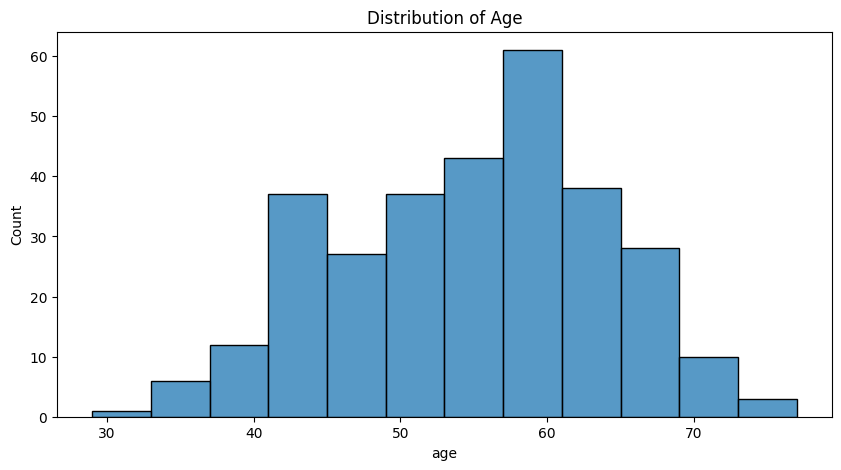

In [10]:
# distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(df['age'])
plt.title('Distribution of Age')
plt.show()

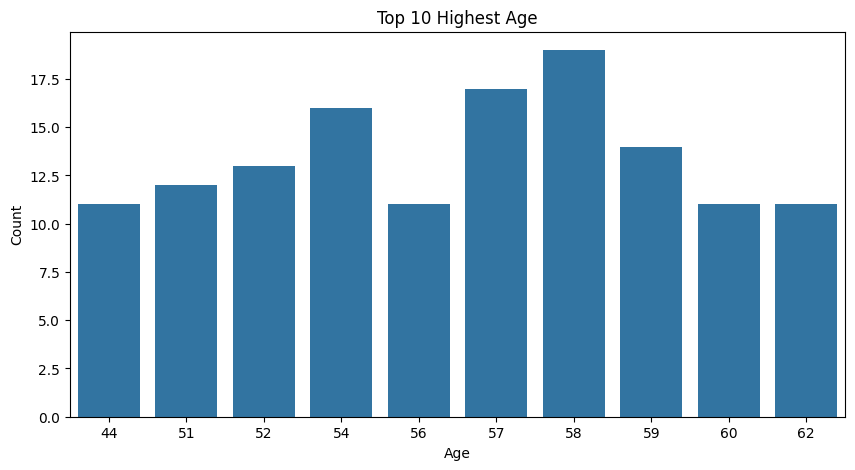

In [11]:
## top 10 highest age in the dataset
plt.figure(figsize=(10,5))
sns.barplot(x=df['age'].value_counts().head(10).index, y=df['age'].value_counts().head(10).values)
plt.title('Top 10 Highest Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

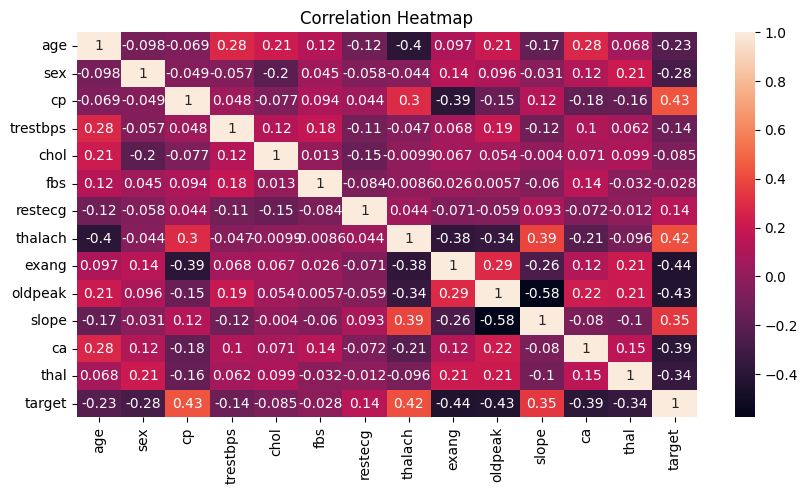

In [12]:
## correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
## checking chest pain columns
chest_pain_count=df['cp'].value_counts()
print(chest_pain_count)

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64


<ipython-input-14-c70f827f247f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['cp'].value_counts().index,y=df['cp'].value_counts().values,palette=colors)


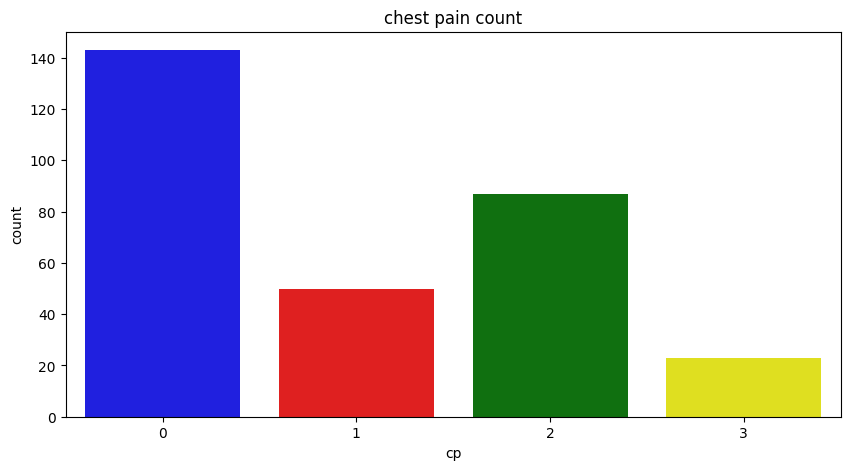

In [14]:
plt.figure(figsize=(10,5))
colors=['blue','red','green','yellow']
sns.barplot(x=df['cp'].value_counts().index,y=df['cp'].value_counts().values,palette=colors)
plt.title('chest pain count')
plt.xlabel('cp')
plt.ylabel('count')
plt.show()

In [15]:
from __future__ import generator_stop
## count of male and female
generator_stop=df['sex'].value_counts()
print("\n total number of male and female")
print(f'male:{generator_stop[1]}')
print(f'female:{generator_stop[0]}')


 total number of male and female
male:207
female:96


<ipython-input-16-58c5923b33ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['sex'].value_counts().index,y=df['sex'].value_counts().values,palette=colors)


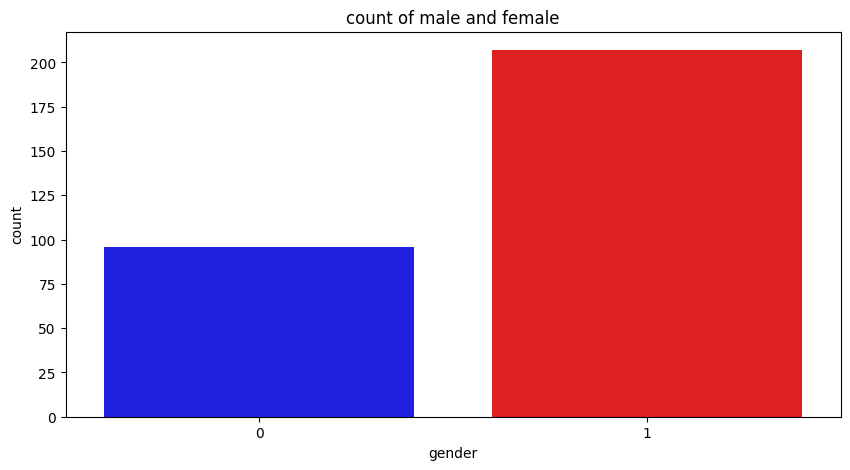

In [16]:
plt.figure(figsize=(10,5))
colors=['blue','red']
sns.barplot(x=df['sex'].value_counts().index,y=df['sex'].value_counts().values,palette=colors)
plt.title('count of male and female')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

target
1    165
0    138
Name: count, dtype: int64


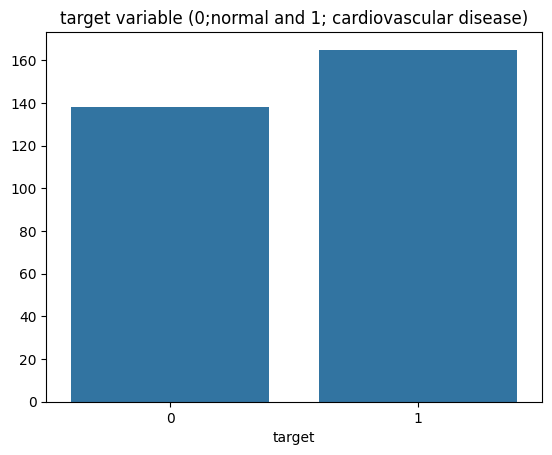

In [17]:
## target variable
target_count=df['target'].value_counts()
sns.barplot(x=df['target'].value_counts().index,y=df['target'].value_counts().values)
plt.title('target variable (0;normal and 1; cardiovascular disease)')
print(target_count)

Data preprocessing

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


splitting data into train (80%) and test (20%)

In [19]:
from sklearn.model_selection import train_test_split

X= df.drop(columns=['target'])
y=df['target']

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


supervised machine learning models
1. support vector machine
2. knearest neighbor
3. naive bayes
4. logisitic regression

In [22]:
svm= SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
log = LogisticRegression()

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

svm= svm.fit(X_train, y_train)
knn = knn.fit(X_train, y_train)
nb = nb.fit(X_train, y_train)
log = log.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
SVC_pred =  svm.predict(X_test)
KNN_pred = knn.predict(X_test)
NB_pred = nb.predict(X_test)
LOG_pred = log.predict(X_test)

In [25]:
print (SVC_pred)

[0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0]


supervised machine learning accuracy

In [26]:
print (f'SVC accuracy: {accuracy_score(y_test, SVC_pred)}')
print (f'KNN accuracy: {accuracy_score(y_test, KNN_pred)}')
print (f'NB accuracy: {accuracy_score(y_test, NB_pred)}')
print (f'LOG accuracy: {accuracy_score(y_test, LOG_pred)}')

SVC accuracy: 0.7049180327868853
KNN accuracy: 0.6885245901639344
NB accuracy: 0.8688524590163934
LOG accuracy: 0.8852459016393442


model evaluation

classification report of SVC:               precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61

[[15 14]
 [ 4 28]]


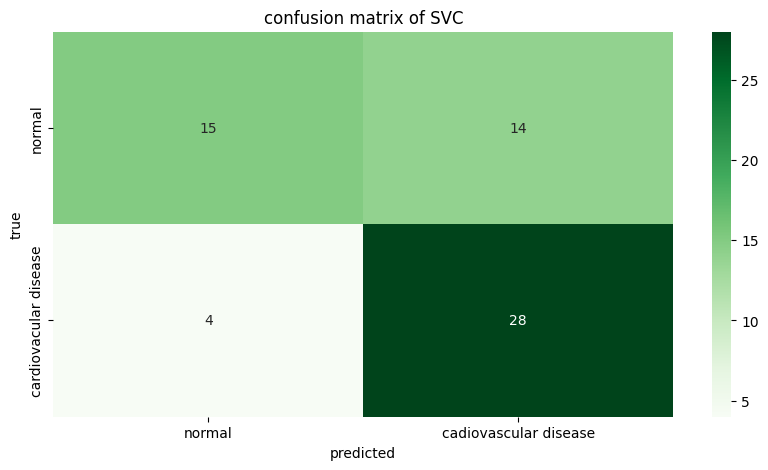

In [27]:
print (f'classification report of SVC: {classification_report(y_test, SVC_pred)}')
con_matrix = confusion_matrix(y_test, SVC_pred)
print (con_matrix)

## plot confusion graph
plt.figure(figsize=(10,5))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='Greens',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.title('confusion matrix of SVC')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

classification report of KNN:               precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

[[18 11]
 [ 8 24]]


Text(0.5, 1.0, 'confusion matrix of KNN')

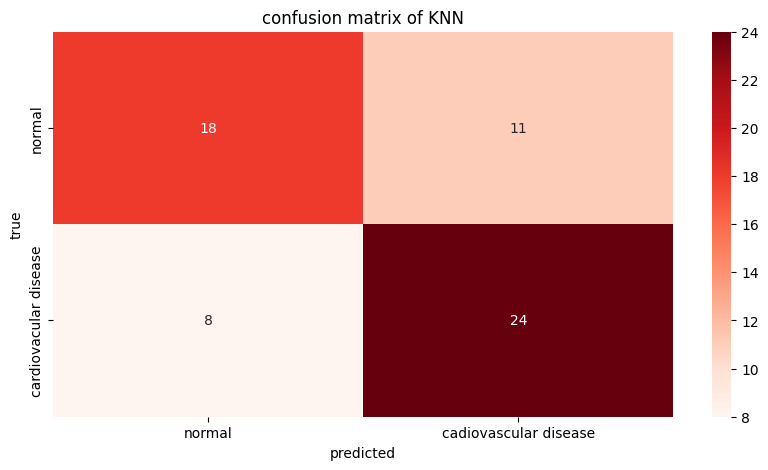

In [28]:
print (f'classification report of KNN: {classification_report(y_test, KNN_pred)}')
con_matrix = confusion_matrix(y_test, KNN_pred)
print (con_matrix)

#plot confusion graph
plt.figure(figsize=(10,5))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='Reds',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of KNN')

classification report of NB:               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[26  3]
 [ 5 27]]


Text(0.5, 1.0, 'confusion matrix of NB')

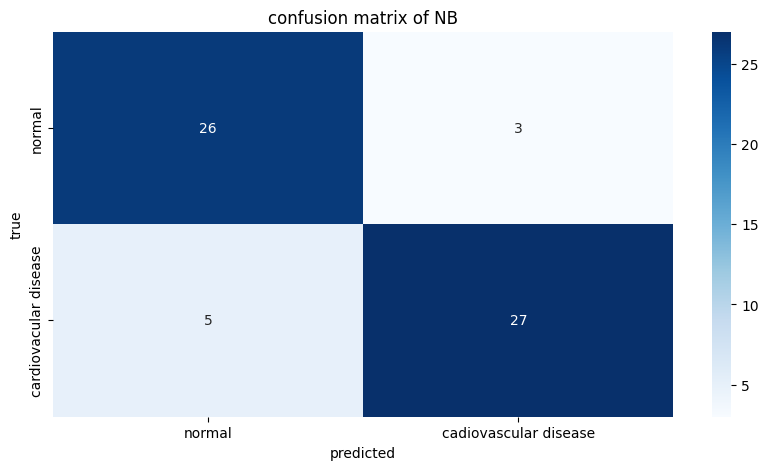

In [29]:
print (f'classification report of NB: {classification_report(y_test, NB_pred)}')
con_matrix = confusion_matrix(y_test, NB_pred)
print (con_matrix)

##plot confusion graph
plt.figure(figsize=(10,5))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='Blues',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of NB')

classification report of LOG:               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

[[25  4]
 [ 3 29]]


Text(0.5, 1.0, 'confusion matrix of LOG')

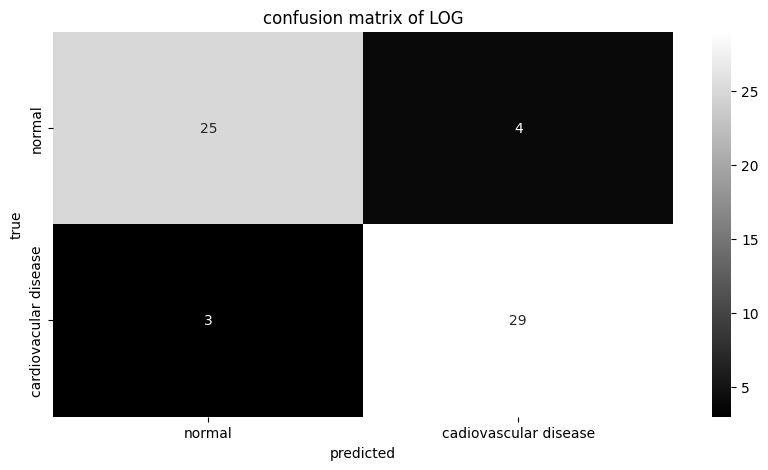

In [30]:
print(f'classification report of LOG: {classification_report(y_test, LOG_pred)}')
con_matrix=con_matrix = confusion_matrix(y_test, LOG_pred)
print (con_matrix)

##plot confusion graph
plt.figure(figsize=(10,5))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='grey',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of LOG')

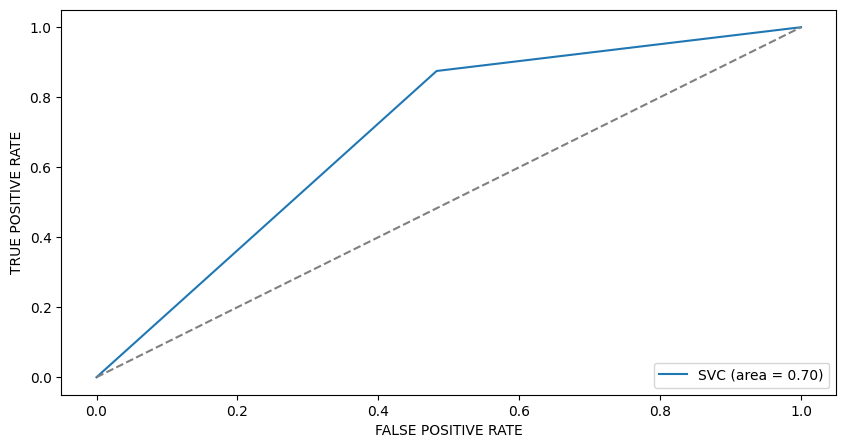

In [31]:
roc_auc = roc_auc_score(y_test, SVC_pred)
fpr, tpr, _=roc_curve(y_test, SVC_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

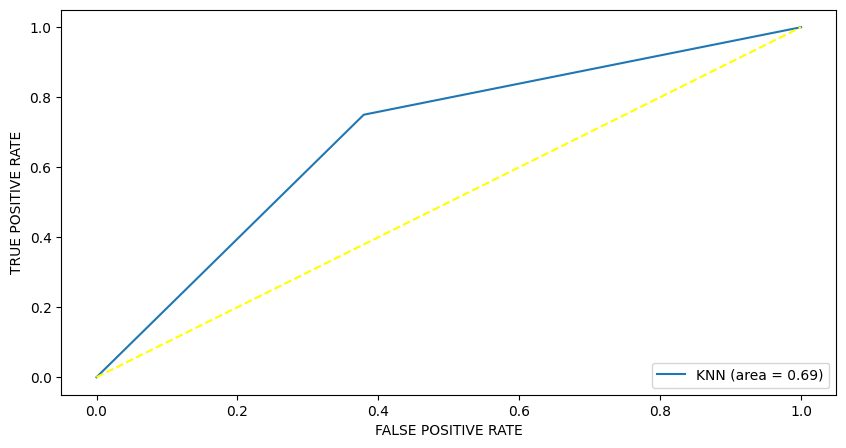

In [32]:
roc_auc = roc_auc_score(y_test, KNN_pred)
fpr, tpr, _=roc_curve(y_test, KNN_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='Yellow')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

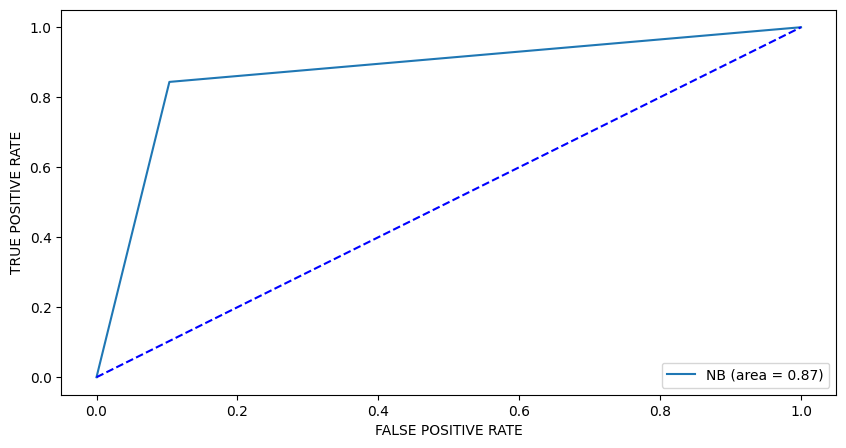

In [33]:
roc_auc = roc_auc_score(y_test, NB_pred)
fpr, tpr, _=roc_curve(y_test, NB_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='Blue')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

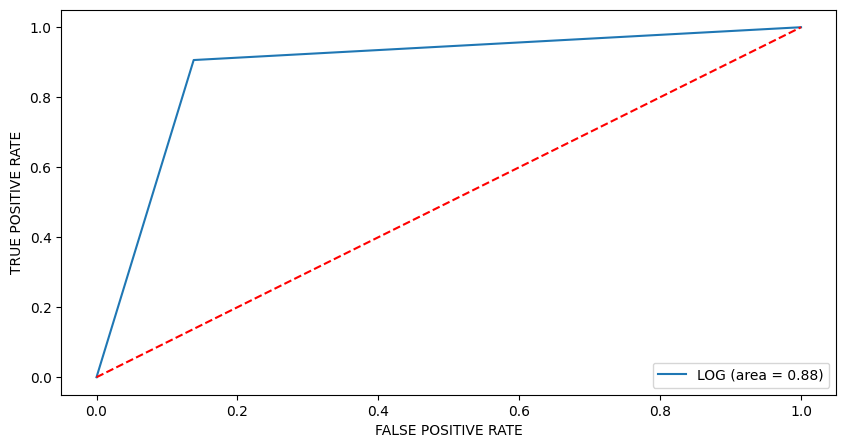

In [34]:
roc_auc = roc_auc_score(y_test, LOG_pred)
fpr, tpr, _=roc_curve(y_test, LOG_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='LOG (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='Red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

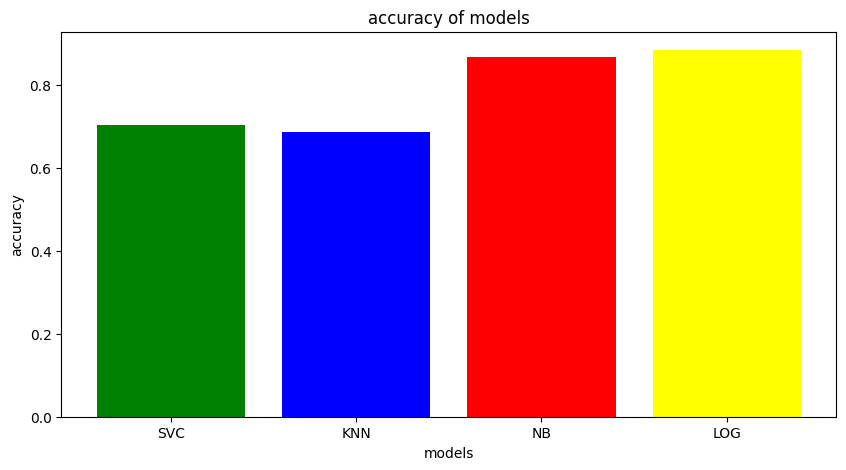

In [35]:
models=['SVC','KNN','NB','LOG']
colors=['green','blue','red','yellow']
accuracy=[accuracy_score(y_test, SVC_pred),accuracy_score(y_test, KNN_pred),accuracy_score(y_test, NB_pred),accuracy_score(y_test, LOG_pred)]
plt.figure(figsize=(10,5))
plt.bar(models,accuracy,color=colors)
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('accuracy of models')
plt.show()

## Ensemble model

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)

classification report for gradient boosting
               precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

[[23  6]
 [ 8 24]]


Text(0.5, 1.0, 'confusion matrix of gradient boosting')

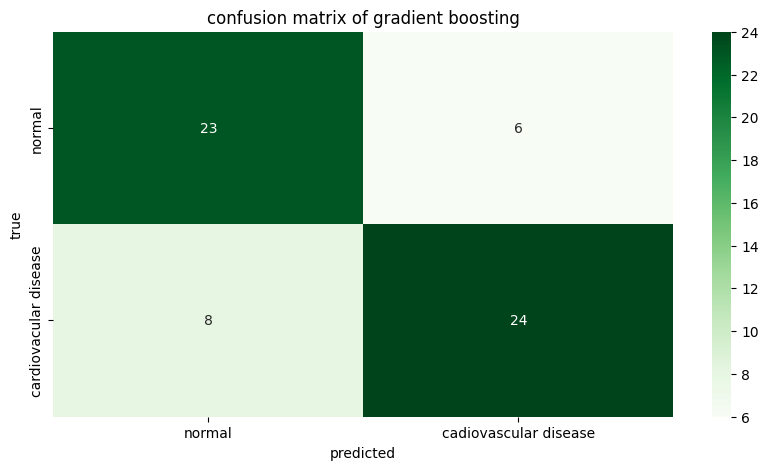

In [38]:
print ('classification report for gradient boosting\n',classification_report(y_test, y_pred_gbc))
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
print (conf_matrix)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Greens',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of gradient boosting')

In [39]:
from sklearn.ensemble import BaggingClassifier

In [40]:

base_classifier=DecisionTreeClassifier()
bc= BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bc.fit(X_train,y_train)
y_pred_bc=bc.predict(X_test)

classification report for bagging
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

[[25  4]
 [ 8 24]]


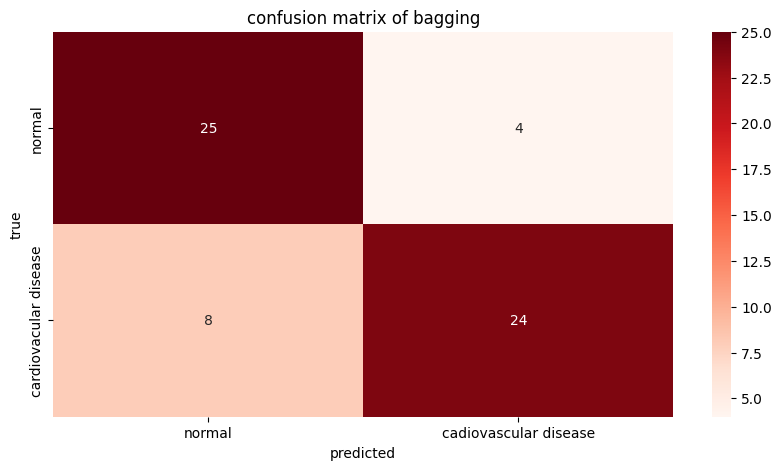

In [41]:
print ('classification report for bagging\n',classification_report(y_test, y_pred_bc))
conf_matrix = confusion_matrix(y_test, y_pred_bc)
print (conf_matrix)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Reds',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of bagging')
plt.show()

In [42]:
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()

## creating list classifiers and a meta classifier
stacking = StackingClassifier(classifiers=[clf1,clf2], meta_classifier=clf2)
stacking.fit(X_train,y_train)
y_pred_stacking=stacking.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


classification report for stacking
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



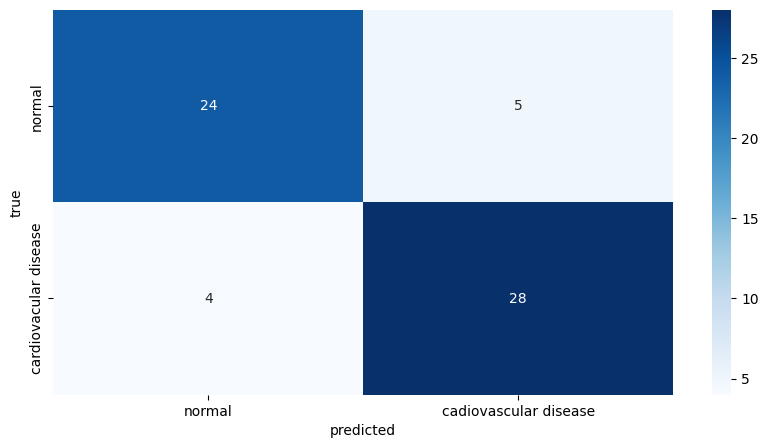

In [44]:
print ('classification report for stacking\n',classification_report(y_test, y_pred_stacking))
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

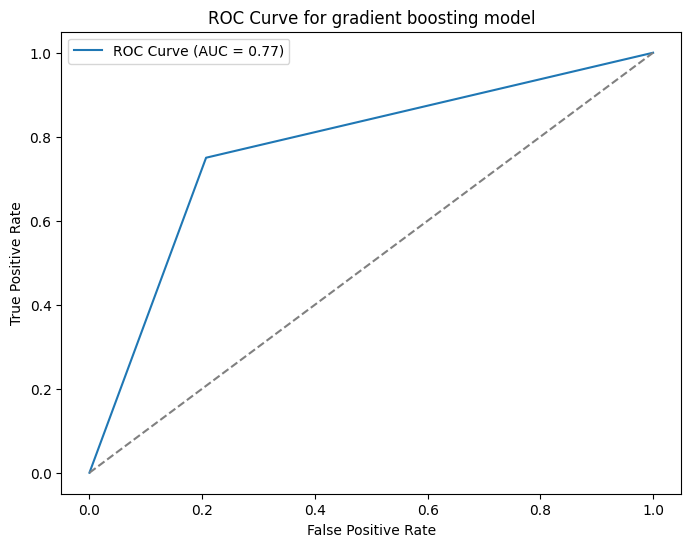

In [45]:
# ROC-AUC curve
roc_auc = roc_auc_score(y_test,y_pred_gbc)
fpr, tpr, _ = roc_curve(y_test, y_pred_gbc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for gradient boosting model')
plt.legend()
plt.show()

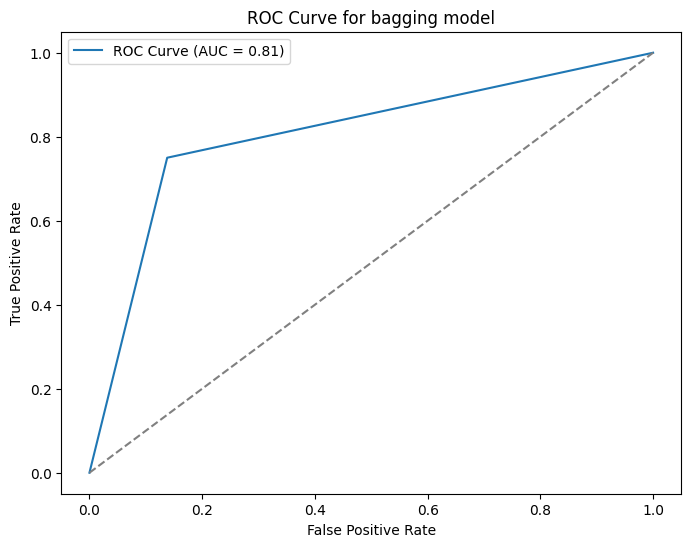

In [46]:
roc_auc = roc_auc_score(y_test,y_pred_bc)
fpr, tpr, _ = roc_curve(y_test, y_pred_bc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for bagging model')
plt.legend()
plt.show()

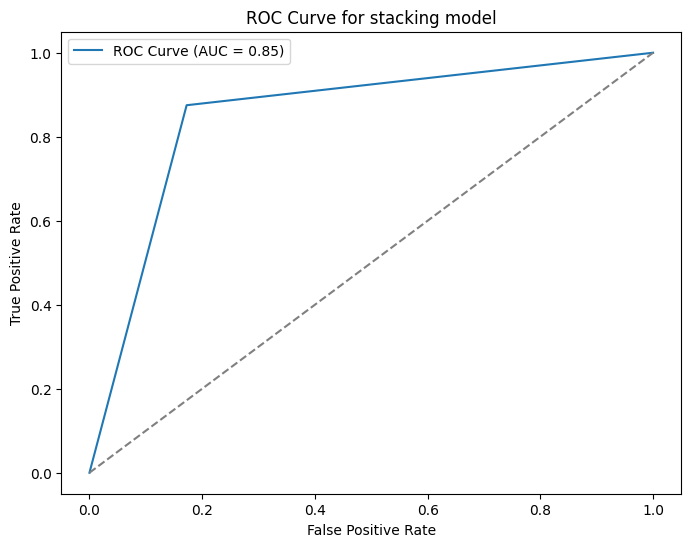

In [47]:
roc_auc = roc_auc_score(y_test,y_pred_stacking)
fpr, tpr, _ = roc_curve(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for stacking model')
plt.legend()
plt.show()

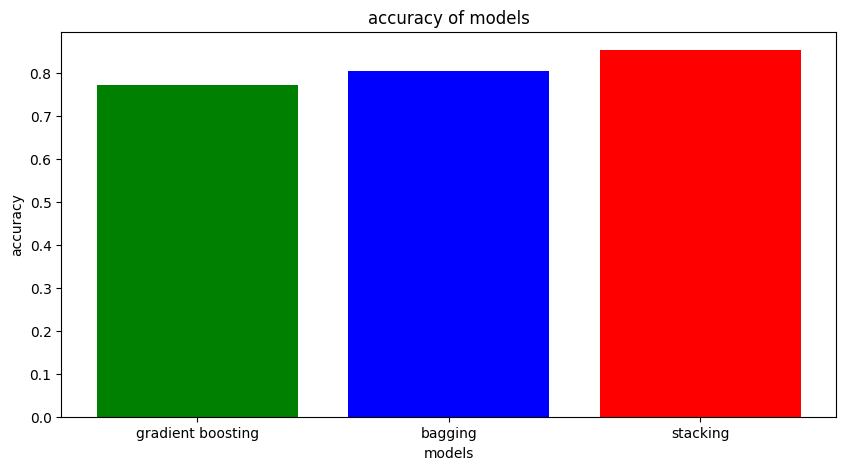

In [48]:
models= ['gradient boosting','bagging','stacking']
colors=['green','blue','red']
accuracy=[accuracy_score(y_test, y_pred_gbc),accuracy_score(y_test, y_pred_bc),accuracy_score(y_test, y_pred_stacking)]
plt.figure(figsize=(10,5))
plt.bar(models,accuracy,color=colors)
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('accuracy of models')
plt.show()

Model comparison

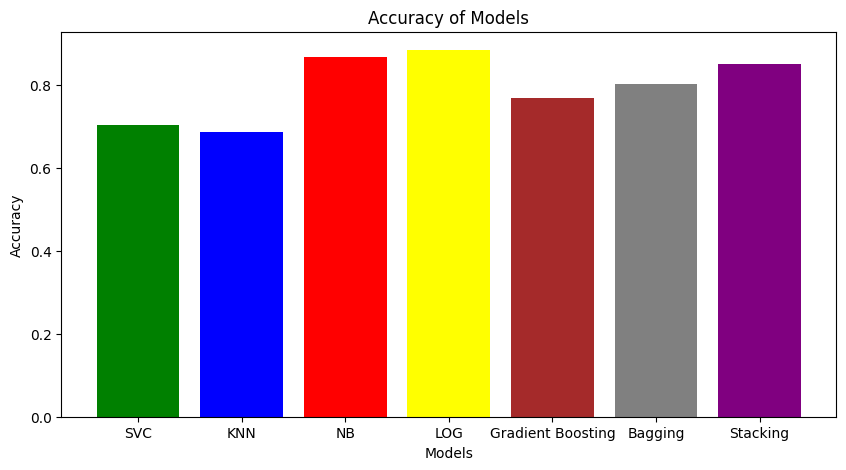

In [49]:
models = ['SVC', 'KNN', 'NB', 'LOG', 'Gradient Boosting', 'Bagging', 'Stacking']
colors = ['green', 'blue', 'red', 'yellow', 'brown', 'grey', 'purple']
accuracy=[
    accuracy_score(y_test, SVC_pred),
    accuracy_score(y_test, KNN_pred),
    accuracy_score(y_test, NB_pred),
    accuracy_score(y_test, LOG_pred),
    accuracy_score(y_test, y_pred_gbc),
    accuracy_score(y_test, y_pred_bc),
    accuracy_score(y_test, y_pred_stacking)
]
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

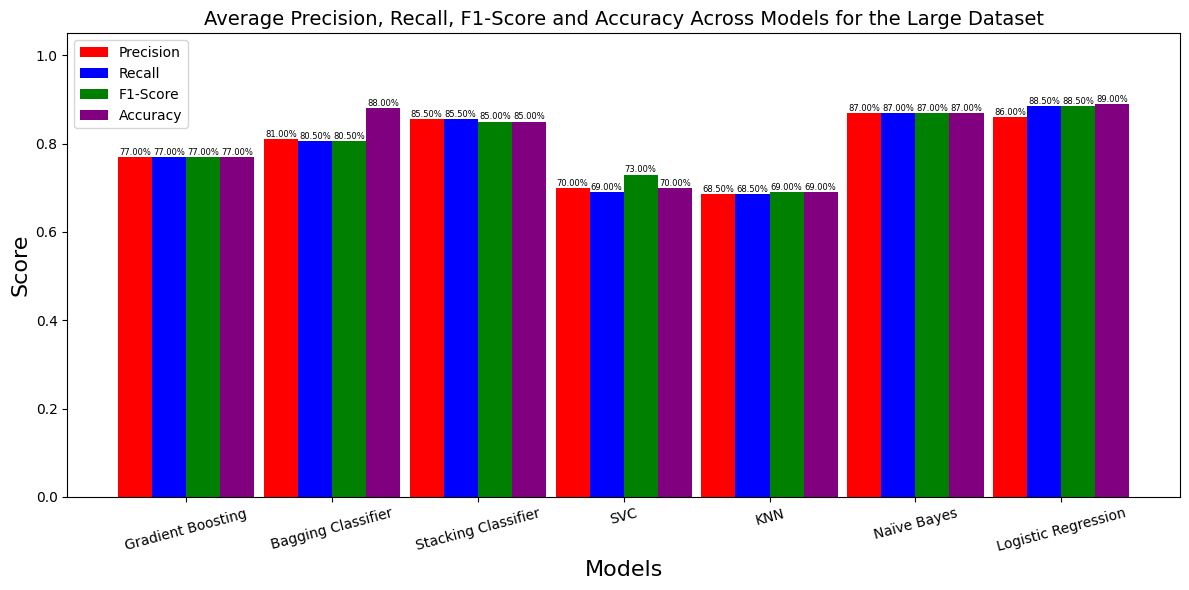

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ["Gradient Boosting", "Bagging Classifier", "Stacking Classifier",
          "SVC", "KNN", "Naïve Bayes", "Logistic Regression"]

# Metric values per model (for 2 classes each)
gradient_boosting = {
    "precision": [0.74, 0.80],
    "recall": [0.79, 0.75],
    "f1-score": [0.77, 0.77],
    'accuracy':[0.77]
}

bagging_classifier = {
    "precision": [0.76, 0.86],
    "recall": [0.86,0.75],
    "f1-score": [0.81,0.80],
    'accuracy':[0.88]
}

stacking_classifier = {
    "precision": [0.86, 0.85],
    "recall": [0.83, 0.88],
    "f1-score": [0.84, 0.86],
    'accuracy':[0.85]
}

svc = {
    "precision": [0.52, 0.88],
    "recall": [0.62, 0.76],
    "f1-score": [0.79, 0.67],
    'accuracy':[0.70]
}

knn = {
    "precision": [0.62, 0.75],
    "recall": [0.65, 0.72],
    "f1-score": [0.69,0.69],
    'accuracy':[0.69]
}

naive_bayes = {
    "precision": [0.90, 0.84],
    "recall": [0.87, 0.87],
    "f1-score": [0.84,0.90],
    'accuracy':[0.87]
}

log_reg = {
    "precision": [0.81, 0.91],
    "recall": [0.88, 0.89],
    "f1-score": [0.89,0.88],
    'accuracy':[0.89]
}

# Compute averages
precision_scores = [
    np.mean(gradient_boosting["precision"]), np.mean(bagging_classifier["precision"]),
    np.mean(stacking_classifier["precision"]), np.mean(svc["precision"]),
    np.mean(knn["precision"]), np.mean(naive_bayes["precision"]), np.mean(log_reg["precision"])
]

recall_scores = [
    np.mean(gradient_boosting["recall"]), np.mean(bagging_classifier["recall"]),
    np.mean(stacking_classifier["recall"]), np.mean(svc["recall"]),
    np.mean(knn["recall"]), np.mean(naive_bayes["recall"]), np.mean(log_reg["recall"])
]

f1_scores = [
    np.mean(gradient_boosting["f1-score"]), np.mean(bagging_classifier["f1-score"]),
    np.mean(stacking_classifier["f1-score"]), np.mean(svc["f1-score"]),
    np.mean(knn["f1-score"]), np.mean(naive_bayes["f1-score"]), np.mean(log_reg["f1-score"])
]


accuracy_scores = [
    gradient_boosting['accuracy'][0], bagging_classifier['accuracy'][0],
    stacking_classifier['accuracy'][0], svc['accuracy'][0],
    knn['accuracy'][0], naive_bayes['accuracy'][0], log_reg['accuracy'][0]
]

# Plotting
x = np.arange(len(models)) * 1.5  # Add spacing between groups
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - 1.5*width, precision_scores, width, label="Precision", color="red")
bars2 = ax.bar(x - 0.5*width, recall_scores, width, label="Recall", color="blue")
bars3 = ax.bar(x + 0.5*width, f1_scores, width, label="F1-Score", color="green")
bars4 = ax.bar(x + 1.5*width, accuracy_scores, width, label="Accuracy", color="purple")

# Add values on top of bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.0005, f"{height:.2%}", ha='center', va='bottom', fontsize=6)

# Labels and formatting
ax.set_xlabel("Models", fontsize=16)
ax.set_ylabel("Score", fontsize=16)
ax.set_title("Average Precision, Recall, F1-Score and Accuracy Across Models for the Large Dataset", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10, rotation=15)
ax.set_ylim(0, 1.05)
ax.legend()

plt.tight_layout()
plt.show()
